# ------------------ BigMart EDA Analaysis and Sales Prediction--------------------

## loading the library

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [8]:
big=pd.read_csv("bigdata_train.csv")
big=pd.DataFrame(data=big)

In [9]:
big

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [10]:
# statistical info
big.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
#dataype of attributes
big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
#check unique values in dataset
big.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## preprocessing the dataset

In [13]:
# checking the null values in a dataset
big.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [14]:
# printing the categorical columns
for col in big.select_dtypes(include=[object]):
    print(big[col].value_counts())
    print("\n")

FDW13    10
FDG33    10
DRN47     9
FDF52     9
FDW26     9
         ..
FDN52     1
FDC23     1
DRF48     1
FDO33     1
FDY43     1
Name: Item_Identifier, Length: 1559, dtype: int64


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Mediu

In [15]:
# filling the missing values of the column"Item_Weight" by there mean
big["Item_Weight"]=big["Item_Weight"].fillna(big["Item_Weight"].mean())

In [16]:
big

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [17]:
#checking again the null values
big.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
# filling the missing values of the column 'Outlet_Size' by there mode(as its is categorical data)
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
big['Outlet_Size']=imp.fit_transform(big['Outlet_Size'].values.reshape(-1,1))
big

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [19]:
big.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [20]:
#Now if we see in the dataset the item visibility column some values are zero for correposding item type like 
#Fruits and Vegetables,Household etc
#which cannnot happen so we need to replace it by the mean of the that column. 
big["Item_Visibility"]=big["Item_Visibility"].replace(0,big["Item_Visibility"].mean())

In [21]:
big

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [22]:
#now while printing catergorical columns above we have seen that in column "item fat content" same fat content is represented
#in different ways like Lower fat or LF or low fat and regular or reg.So we need to add them to bring in same category
big["Item_Fat_Content"]=big["Item_Fat_Content"].replace({"LF":"Low Fat","reg":"Regular","low fat":"Low Fat"})

In [23]:
# now data is properly categorized in Low Fat and regular
big["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In the dataset there are some item type which are not edible and there fat_content is refered as low or regular
which is not possible, so we now add one more category in the fat content column as not edible. 
Before that we will extract first two letter and make new column from item_identifier.so that we can differentaite non-edible
items with edible. 

In [24]:
big["new_item"]=big["Item_Identifier"].str[:2]

In [25]:
big

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FD
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,FD
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NC
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FD


In [26]:
#so we can see that item identifier has three different category and 'NC' is refrening to item whic is not consumable 
big["new_item"].value_counts()

FD    6125
NC    1599
DR     799
Name: new_item, dtype: int64

In [27]:
#replacing the value coresponding to NC as Non_edible
big.loc[big["new_item"]=="NC","Item_Fat_Content"]="Non-Edible"

In [28]:
big

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.930,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,FD
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850,FD
8520,NCJ29,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,NC
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FD


In [29]:
big['Outlet_Years'] = 2019 - big['Outlet_Establishment_Year']
big['Outlet_Years'].describe()

count    8523.000000
mean       21.168133
std         8.371760
min        10.000000
25%        15.000000
50%        20.000000
75%        32.000000
max        34.000000
Name: Outlet_Years, dtype: float64

In [30]:
big.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,20
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,10
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,20
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,FD,21
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,32


# EDA: Exploratory Data Analysis

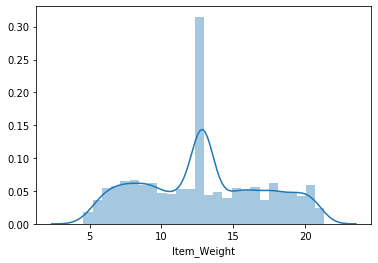

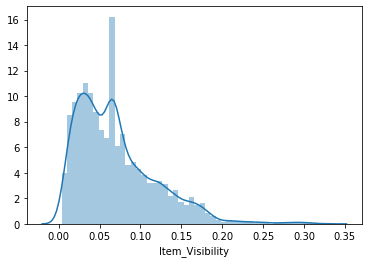

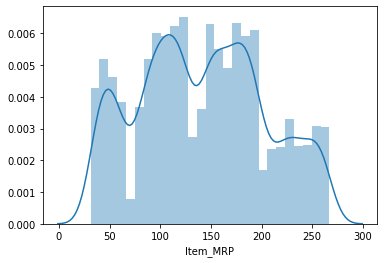

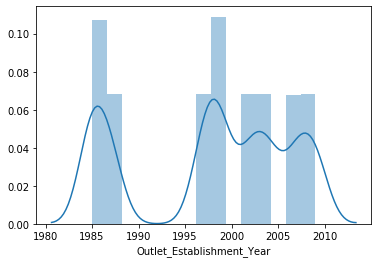

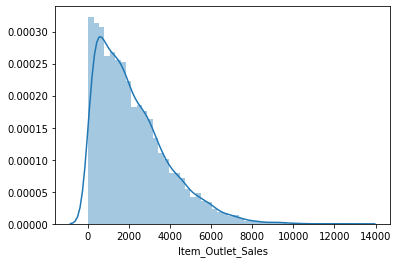

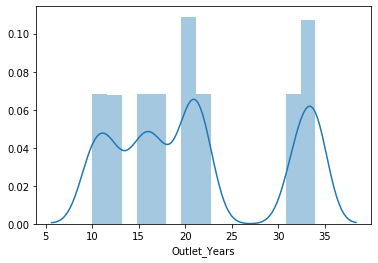

In [31]:
#plotting the distribution plot excluding categorical columns
for col in big.select_dtypes(exclude=[object]):
    sns.distplot(big[col])
    plt.show()

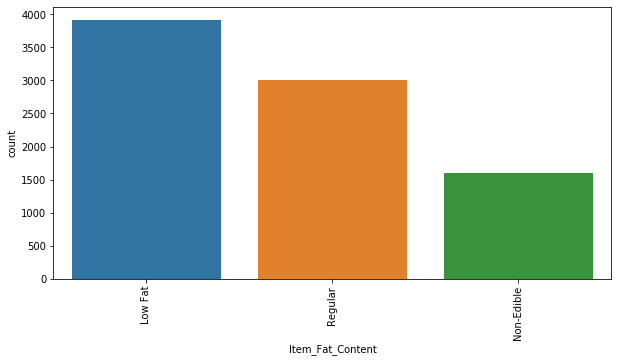

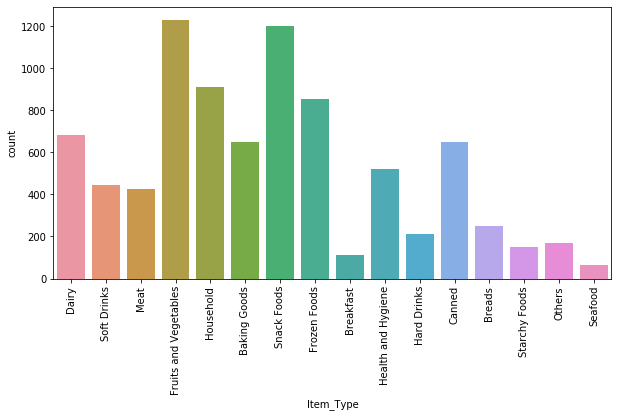

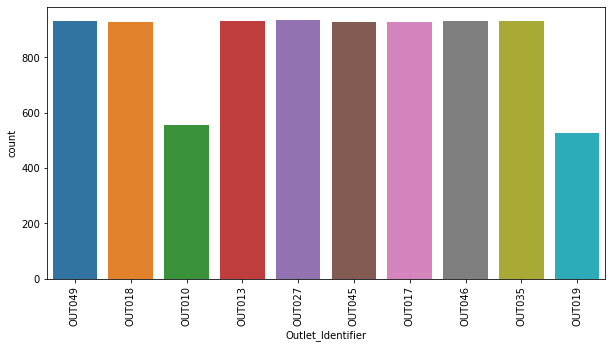

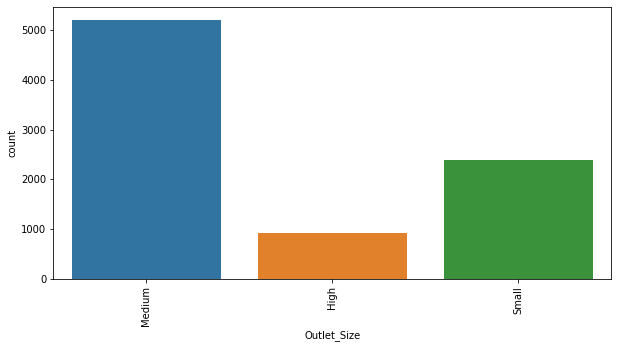

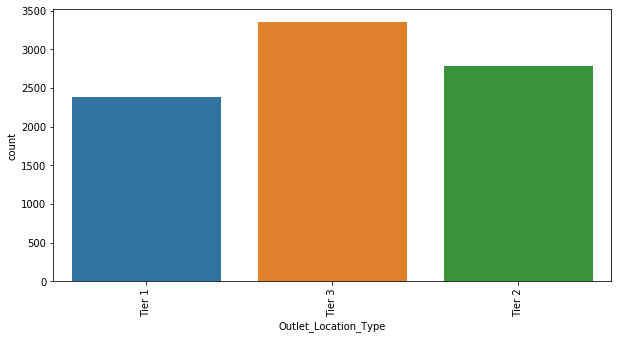

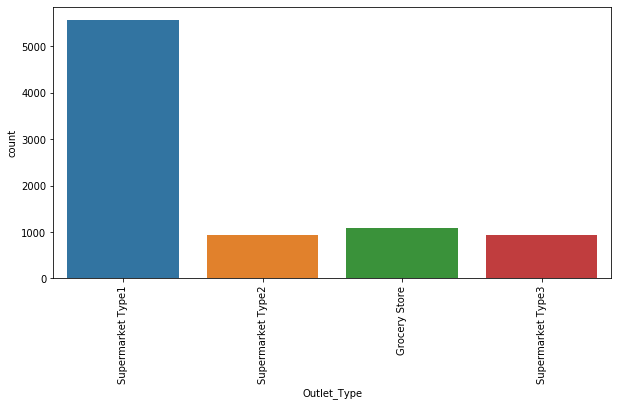

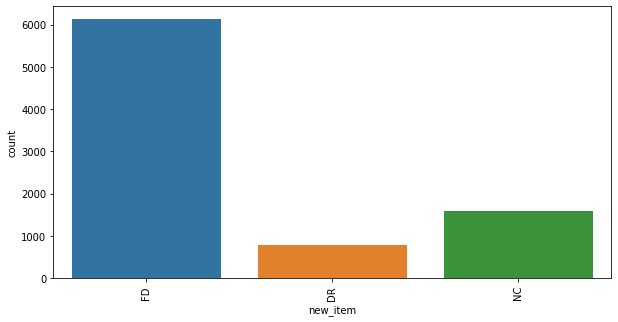

In [32]:
#plotting the count plot for categorical columns and we can viualize that which item or which store is usually prefered
for col in big.iloc[:,1:].select_dtypes(include=[object]):
    l=list(big[col].unique())
    plt.figure(figsize=(10,5))
    c=sns.countplot(big[col])
    c.set_xticklabels(labels=l,rotation=90)
    plt.show()

### Coorelation Matrix

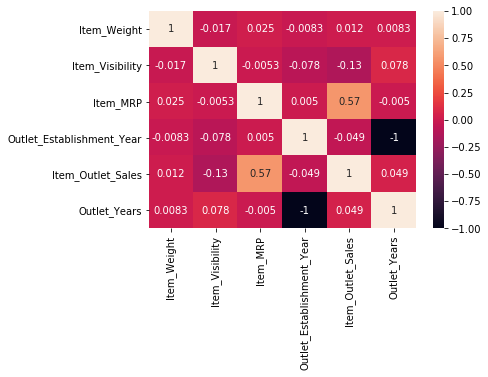

In [33]:
corr=big.corr()
sns.heatmap(corr,annot=True)

### Label Encoding

In [34]:
# now we will convert catergorical attributes to numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cat_col=["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type","new_item"]
for col in cat_col:
    big[col]=le.fit_transform(big[col])

In [35]:
big

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new_item,Outlet_Years
0,156,9.300,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,1,20
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228,0,10
2,662,17.500,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,1,20
3,1121,19.200,2,0.066132,6,182.0950,0,1998,1,2,0,732.3800,1,21
4,1297,8.930,1,0.066132,9,53.8614,1,1987,0,2,1,994.7052,2,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0,0.056783,13,214.5218,1,1987,0,2,1,2778.3834,1,32
8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850,1,17
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136,2,15
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976,1,10


In [38]:
big = pd.get_dummies(big, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Outlet_Identifier'])

In [39]:
big

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,new_item,Outlet_Years,Item_Fat_Content_0,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,156,9.300,0.016047,4,249.8092,1999,3735.1380,1,20,1,...,0,0,0,0,0,0,0,0,0,1
1,8,5.920,0.019278,14,48.2692,2009,443.4228,0,10,0,...,0,0,0,1,0,0,0,0,0,0
2,662,17.500,0.016760,10,141.6180,1999,2097.2700,1,20,1,...,0,0,0,0,0,0,0,0,0,1
3,1121,19.200,0.066132,6,182.0950,1998,732.3800,1,21,0,...,1,0,0,0,0,0,0,0,0,0
4,1297,8.930,0.066132,9,53.8614,1987,994.7052,2,32,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0.056783,13,214.5218,1987,2778.3834,1,32,1,...,0,1,0,0,0,0,0,0,0,0
8519,897,8.380,0.046982,0,108.1570,2002,549.2850,1,17,0,...,0,0,0,0,0,0,0,1,0,0
8520,1357,10.600,0.035186,8,85.1224,2004,1193.1136,2,15,0,...,0,0,0,0,0,0,1,0,0,0
8521,681,7.210,0.145221,13,103.1332,2009,1845.5976,1,10,0,...,0,0,0,1,0,0,0,0,0,0


### Input split

In [40]:
# now before training the model lets check the skewness and outlier also
big.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Visibility              1.286877
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
new_item                     0.114510
Outlet_Years                 0.396641
Item_Fat_Content_0           0.161766
Item_Fat_Content_1           1.600639
Item_Fat_Content_2           0.616705
Outlet_Location_Type_0       0.979119
Outlet_Location_Type_1       0.738834
Outlet_Location_Type_2       0.437995
Outlet_Size_0                2.503964
Outlet_Size_1               -0.453138
Outlet_Size_2                0.979119
Outlet_Type_0                2.239897
Outlet_Type_1               -0.649203
Outlet_Type_2                2.511707
Outlet_Type_3                2.498184
Outlet_Identifier_0          3.525732
Outlet_Identifier_1          2.503964
Outlet_Identifier_2          2.515596
Outlet_Identifier_3          2.511707
Outlet_Ident

In [41]:
#before removing the skewness, we checking for the outliners in the dataset.And if any outliner is present then its removed with help of zscore
from scipy.stats import zscore
z_score=abs(zscore(big))
print(big.shape)
df_bigx=big[(z_score<3).all(axis=1)]
print(df_bigx.shape)

(8523, 32)
(7350, 32)


In [42]:
# we will now split the data and we will remove the item_identifier column as we have made new_item column from that only
df_x=df_bigx.drop(columns=["Item_Identifier","Item_Outlet_Sales","Outlet_Establishment_Year"],axis=1)
y=df_bigx["Item_Outlet_Sales"]

In [43]:
#After removing outliner we need to remove skewness which is done by boxcox
from scipy.stats import boxcox
for col in df_bigx.columns:
    if df_bigx.skew().loc[col]>0.55:
        df_bigx[col]=np.log1p(df_bigx[col])

In [44]:
df_bigx.skew()

Item_Identifier              0.000944
Item_Weight                  0.087701
Item_Visibility              0.762393
Item_Type                    0.104173
Item_MRP                     0.143971
Outlet_Establishment_Year   -0.555221
Item_Outlet_Sales           -0.659382
new_item                     0.113663
Outlet_Years                 0.108309
Item_Fat_Content_0           0.162746
Item_Fat_Content_1           1.602896
Item_Fat_Content_2           0.614410
Outlet_Location_Type_0       1.142832
Outlet_Location_Type_1       0.509466
Outlet_Location_Type_2       0.532290
Outlet_Size_0                2.252820
Outlet_Size_1               -0.503491
Outlet_Size_2                1.143664
Outlet_Type_0                0.000000
Outlet_Type_1               -1.184125
Outlet_Type_2                2.250962
Outlet_Type_3                2.353167
Outlet_Identifier_0          0.000000
Outlet_Identifier_1          2.252820
Outlet_Identifier_2          2.269661
Outlet_Identifier_3          2.250962
Outlet_Ident

In [45]:
#still Item_Visibility column has skewness>0.55 so we can also implement squareroot techniquw ro remove skewed data 
df_bigx["Item_Visibility"]=np.sqrt(df_bigx["Item_Visibility"])

In [46]:
#skewness is removed from all columns.Now we can go for training the model
df_bigx.skew()

Item_Identifier              0.000944
Item_Weight                  0.087701
Item_Visibility              0.152882
Item_Type                    0.104173
Item_MRP                     0.143971
Outlet_Establishment_Year   -0.555221
Item_Outlet_Sales           -0.659382
new_item                     0.113663
Outlet_Years                 0.108309
Item_Fat_Content_0           0.162746
Item_Fat_Content_1           1.602896
Item_Fat_Content_2           0.614410
Outlet_Location_Type_0       1.142832
Outlet_Location_Type_1       0.509466
Outlet_Location_Type_2       0.532290
Outlet_Size_0                2.252820
Outlet_Size_1               -0.503491
Outlet_Size_2                1.143664
Outlet_Type_0                0.000000
Outlet_Type_1               -1.184125
Outlet_Type_2                2.250962
Outlet_Type_3                2.353167
Outlet_Identifier_0          0.000000
Outlet_Identifier_1          2.252820
Outlet_Identifier_2          2.269661
Outlet_Identifier_3          2.250962
Outlet_Ident

In [50]:
#before training the model we need to put data in one standard using standardScaler technique
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df_bigx)
x=pd.DataFrame(data=x,columns=df_bigx.columns)
x

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,new_item,Outlet_Years,Item_Fat_Content_0,...,Outlet_Identifier_0,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Outlet_Identifier_4,Outlet_Identifier_5,Outlet_Identifier_6,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9
0,-1.382832,-0.814771,-1.404807,-0.766319,1.771600,0.019932,0.921655,-0.178745,0.171708,1.084660,...,0.0,-0.379901,-0.377788,-0.380136,0.0,-0.367607,-0.379667,-0.379198,-0.379432,2.632262
1,-1.712208,-1.590093,-1.251486,1.606236,-1.482107,1.242793,-1.914519,-2.093873,-1.512831,-0.921948,...,0.0,-0.379901,-0.377788,2.630638,0.0,-0.367607,-0.379667,-0.379198,-0.379432,-0.379901
2,-0.256725,1.066187,-1.369712,0.657214,0.024937,0.019932,0.153090,-0.178745,0.171708,1.084660,...,0.0,-0.379901,-0.377788,-0.380136,0.0,-0.367607,-0.379667,-0.379198,-0.379432,2.632262
3,1.156474,-0.899644,0.215034,0.419958,-1.391825,-1.447502,-0.839913,1.736382,1.349182,-0.921948,...,0.0,2.632262,-0.377788,-0.380136,0.0,-0.367607,-0.379667,-0.379198,-0.379432,-0.379901
4,-0.043076,-0.563594,0.215034,-1.715341,-1.431550,1.242793,-1.612281,-0.178745,-1.512831,-0.921948,...,0.0,-0.379901,-0.377788,2.630638,0.0,-0.367607,-0.379667,-0.379198,-0.379432,-0.379901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7345,-0.906573,-1.373324,-0.015346,1.368980,1.201912,-1.447502,0.527576,-0.178745,1.349182,1.084660,...,0.0,2.632262,-0.377788,-0.380136,0.0,-0.367607,-0.379667,-0.379198,-0.379432,-0.379901
7346,0.266270,-1.025805,-0.280111,-1.715341,-0.515265,0.386790,-1.629894,-0.178745,-0.229872,-0.921948,...,0.0,-0.379901,-0.377788,-0.380136,0.0,-0.367607,-0.379667,2.637147,-0.379432,-0.379901
7347,1.290004,-0.516570,-0.641538,0.182703,-0.887141,0.631362,-0.597852,1.736382,-0.536711,-0.921948,...,0.0,-0.379901,-0.377788,-0.380136,0.0,-0.367607,2.633888,-0.379198,-0.379432,-0.379901
7348,-0.214440,-1.294186,1.685483,1.368980,-0.596370,1.242793,-0.017116,-0.178745,-1.512831,-0.921948,...,0.0,-0.379901,-0.377788,2.630638,0.0,-0.367607,-0.379667,-0.379198,-0.379432,-0.379901


## Model Training

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 1)

In [52]:
x.shape

(7350, 32)

In [53]:
y.shape

(7350,)

In [54]:
#now for model traing we will import some libraries
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def train(m,x,y):
    #train the model
    m.fit(x_train,y_train)
    
    #predict the model
    pred=m.predict(x_test)
    
    #perform cross validation
    cv_score=cross_val_score(m,x,y,scoring="r2")
    
    print("Model Report")
    print("Mean squared error",mean_squared_error(y_test,pred))
    print(' root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    print("r2 score",r2_score(y_test,pred))
    print("CV score",cv_score.mean())

In [55]:
#using model linear regression as target variable is numeric 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
train(lr,x,y)

Model Report
Mean squared error 8.183761091578523e-31
 root mean squared error: 9.046414257361048e-16
r2 score 1.0
CV score 1.0


In [56]:
#using regularization technique so to solve over fitting if any
from sklearn.linear_model import Lasso,Ridge

In [57]:
#lasso technique
ls=Lasso(alpha=0.0001)
train(ls,x,y)

Model Report
Mean squared error 9.607071229088993e-09
 root mean squared error: 9.801566828364225e-05
r2 score 0.9999999824815328
CV score 0.9999999822433864


In [58]:
#ridge technique
rd=Ridge(alpha=0.0001)
train(rd,x,y)


Model Report
Mean squared error 3.03584484656718e-16
 root mean squared error: 1.7423675980019774e-08
r2 score 0.9999999999999994
CV score 0.9999999999999994


In [59]:
from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.0001)
train(enr,x,y)

Model Report
Mean squared error 1.4192106435828539e-08
 root mean squared error: 0.00011913062761451624
r2 score 0.999999974120734
CV score 0.999999982967932


In [60]:
#ensemble technique for boosting
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=300,random_state=46)
train(rfr,x,y)

Model Report
Mean squared error 4.621860603974689e-06
 root mean squared error: 0.0021498512981075434
r2 score 0.9999915720502764
CV score 0.9999652756106278


In [61]:
#AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
adr=AdaBoostRegressor()
train(adr,x,y)

Model Report
Mean squared error 0.004021930082782674
 root mean squared error: 0.06341868875010484
r2 score 0.9926660218830101
CV score 0.9933336961580851


In [62]:
# Ridge Technique is giving minimum error after using regularization to avoid overitting so this is best model

In [66]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 1)
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
pred=rd.predict(x_test)
print("Model Report")
print("Mean squared error    : ",mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
print("r2 score:               ",r2_score(y_test,pred))

Model Report
Mean squared error    :  3.03584484656718e-16
root mean squared error: 1.7423675980019774e-08
r2 score:                0.9999999999999994


In [67]:
from sklearn.externals import joblib
joblib.dump(rd,"rd.bigmart.pkl")


['rd.bigmart.pkl']